In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "3"

In [3]:
# Membaca data penjualan
sales_df = pd.read_excel('sales detail 2021- 2025 maret.xlsx')
print("Data Penjualan:")
sales_df.head()

Data Penjualan:


,slsNoSL,slsDate,cstName,itmName,slsQty,uomName,slsPrice,slsDisc,slsSubTotal,slsPPN,slsTotal
0,SI202109000001,2021-09-03,SINAR UTAMA,SIKACERAM 200 TA-TILEFIX @25KG,3.0,SAK,138105.0,0.0,414315.0,0.0,414315.0
1,SI202109000010,2021-09-03,SINAR LESTARI,SIKAMUR 130 THINBED @40KG,15.0,SAK,71145.0,0.0,1067175.0,0.0,1067175.0
2,SI202109000010,2021-09-03,SINAR LESTARI,SIKAWALL 181 SKIMCOAT @40KG,5.0,SAK,87885.0,0.0,439425.0,0.0,439425.0
3,SI202110000233,2021-09-03,ASIA MAS,SIKACERAM 200 TA-TILEFIX @25KG,15.0,SAK,138105.0,0.0,2071575.0,0.0,2071575.0
4,SI202109000002,2021-09-06,JAYA KEPANDEAN,SIKAMUR 130 THINBED @40KG,20.0,SAK,71145.0,0.0,1422900.0,0.0,1422900.0


In [4]:
# Membaca data daftar barang
item_df = pd.read_excel('Nama Item dan Diskon.xlsx')
print("Data Daftar Barang:")
item_df.head()

Data Daftar Barang:


,itmName,Brand,uomName,Discoint beli (%),Discount Jual (%)
0,AM 110 - SILVER GREY @20KG,AM,PAIL,-,-
1,AM 110 - SUPER WHITE @20KG,AM,PAIL,-,-
2,AM 122 - COMENTITIOUS WATERPROOFING 25KG,AM,SET,-,-
3,AM 151 - STONE COATING GLOSSY @12X1L,AM,LITER,-,-
4,AM 151 - STONE COATING GLOSSY @6X2.5L,AM,GALON,-,-


Kita akan menggabungkan kedua dataset berdasarkan kolom itmName.

In [5]:
# Gabungkan data penjualan dengan daftar barang
merged_df = pd.merge(sales_df, item_df, on='itmName', how='left')
print("\nData Gabungan:")
merged_df.head()


Data Gabungan:


,slsNoSL,slsDate,cstName,itmName,slsQty,uomName_x,slsPrice,slsDisc,slsSubTotal,slsPPN,slsTotal,Brand,uomName_y,Discoint beli (%),Discount Jual (%)
0,SI202109000001,2021-09-03,SINAR UTAMA,SIKACERAM 200 TA-TILEFIX @25KG,3.0,SAK,138105.0,0.0,414315.0,0.0,414315.0,SIKA,SAK,22.16,16.3
1,SI202109000010,2021-09-03,SINAR LESTARI,SIKAMUR 130 THINBED @40KG,15.0,SAK,71145.0,0.0,1067175.0,0.0,1067175.0,SIKA,SAK,22.16,16.3
2,SI202109000010,2021-09-03,SINAR LESTARI,SIKAWALL 181 SKIMCOAT @40KG,5.0,SAK,87885.0,0.0,439425.0,0.0,439425.0,SIKA,SAK,22.16,16.3
3,SI202110000233,2021-09-03,ASIA MAS,SIKACERAM 200 TA-TILEFIX @25KG,15.0,SAK,138105.0,0.0,2071575.0,0.0,2071575.0,SIKA,SAK,22.16,16.3
4,SI202109000002,2021-09-06,JAYA KEPANDEAN,SIKAMUR 130 THINBED @40KG,20.0,SAK,71145.0,0.0,1422900.0,0.0,1422900.0,SIKA,SAK,22.16,16.3


In [6]:
print(merged_df.isnull().sum())  # Cek nilai kosong

slsNoSL                 2
slsDate                 2
cstName                 2
itmName                 2
slsQty                  2
uomName_x               2
slsPrice                1
slsDisc                 1
slsSubTotal             1
slsPPN                  1
slsTotal                1
Brand                3286
uomName_y            3286
Discoint beli (%)    3286
Discount Jual (%)    3286
dtype: int64


In [7]:
merged_df = merged_df.fillna(0)  # Isi nilai kosong dengan 0

In [8]:
# Simpan merged_df ke file CSV
merged_df.to_csv('merged_sales_data.csv', index=False)
print("Data telah disimpan ke 'merged_sales_data.csv'")

Data telah disimpan ke 'merged_sales_data.csv'


## Langkah 2: Membaca Data dan Membersihkan

In [9]:
# Membaca data dari file CSV
merged_df = pd.read_csv('merged_sales_data.csv')

# Tampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print("5 Baris Pertama Data:")
merged_df.head()

5 Baris Pertama Data:


,slsNoSL,slsDate,cstName,itmName,slsQty,uomName_x,slsPrice,slsDisc,slsSubTotal,slsPPN,slsTotal,Brand,uomName_y,Discoint beli (%),Discount Jual (%)
0,SI202109000001,2021-09-03 00:00:00,SINAR UTAMA,SIKACERAM 200 TA-TILEFIX @25KG,3.0,SAK,138105.0,0.0,414315.0,0.0,414315.0,SIKA,SAK,22.16,16.3
1,SI202109000010,2021-09-03 00:00:00,SINAR LESTARI,SIKAMUR 130 THINBED @40KG,15.0,SAK,71145.0,0.0,1067175.0,0.0,1067175.0,SIKA,SAK,22.16,16.3
2,SI202109000010,2021-09-03 00:00:00,SINAR LESTARI,SIKAWALL 181 SKIMCOAT @40KG,5.0,SAK,87885.0,0.0,439425.0,0.0,439425.0,SIKA,SAK,22.16,16.3
3,SI202110000233,2021-09-03 00:00:00,ASIA MAS,SIKACERAM 200 TA-TILEFIX @25KG,15.0,SAK,138105.0,0.0,2071575.0,0.0,2071575.0,SIKA,SAK,22.16,16.3
4,SI202109000002,2021-09-06 00:00:00,JAYA KEPANDEAN,SIKAMUR 130 THINBED @40KG,20.0,SAK,71145.0,0.0,1422900.0,0.0,1422900.0,SIKA,SAK,22.16,16.3


In [10]:
# Cek apakah ada nilai kosong (NaN)
print("\nJumlah Nilai Kosong per Kolom:")
print(merged_df.isnull().sum())


Jumlah Nilai Kosong per Kolom:
slsNoSL              0
slsDate              0
cstName              0
itmName              0
slsQty               0
uomName_x            0
slsPrice             0
slsDisc              0
slsSubTotal          0
slsPPN               0
slsTotal             0
Brand                0
uomName_y            0
Discoint beli (%)    0
Discount Jual (%)    0
dtype: int64


In [11]:
# Hapus baris yang semua nilainya kosong atau tidak valid (misalnya baris terakhir dengan nilai aneh)
merged_df = merged_df.dropna(how='all')

# Filter baris yang memiliki cstName dan itmName valid (hilangkan baris total atau error)
merged_df = merged_df[merged_df['cstName'].notnull() & merged_df['itmName'].notnull()]

# Ganti nilai kosong di kolom numerik dengan 0 (jika ada)
merged_df = merged_df.fillna(0)

# Tampilkan info data setelah pembersihan
print("\nInfo Data Setelah Pembersihan:")
print(merged_df.info())


Info Data Setelah Pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28668 entries, 0 to 28667
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   slsNoSL            28668 non-null  object 
 1   slsDate            28668 non-null  object 
 2   cstName            28668 non-null  object 
 3   itmName            28668 non-null  object 
 4   slsQty             28668 non-null  float64
 5   uomName_x          28668 non-null  object 
 6   slsPrice           28668 non-null  float64
 7   slsDisc            28668 non-null  float64
 8   slsSubTotal        28668 non-null  float64
 9   slsPPN             28668 non-null  float64
 10  slsTotal           28668 non-null  float64
 11  Brand              28668 non-null  object 
 12  uomName_y          28668 non-null  object 
 13  Discoint beli (%)  28668 non-null  object 
 14  Discount Jual (%)  28668 non-null  object 
dtypes: float64(6), object(9)
memory usage:

Data sudah terbaca dengan benar, tidak ada nilai kosong (NaN), dan setelah pembersihan, kita memiliki 28.668 baris dengan 15 kolom. Baris terakhir yang aneh (dengan nilai total besar) tampaknya sudah dihapus oleh filter. Sekarang kita bisa lanjut ke langkah berikutnya.

## Langkah 3: Ekstraksi Fitur per Pelanggan dan Merek

Pada langkah ini, kita akan mengelompokkan data berdasarkan pelanggan (cstName) dan merek (Brand) untuk membuat fitur yang akan digunakan dalam clustering. Fitur yang akan kita buat meliputi:

- Total pembelian (slsTotal) per merek.
- Total kuantitas (slsQty) per merek.
- Frekuensi pembelian (slsNoSL unik) per merek.

Kita akan menggunakan pivot table untuk membuat kolom per merek.

In [12]:
# Agregasi data per pelanggan dan merek
customer_brand_data = merged_df.groupby(['cstName', 'Brand']).agg({
    'slsTotal': 'sum',      # Total pembelian per merek
    'slsQty': 'sum',        # Total kuantitas per merek
    'slsNoSL': 'nunique'    # Frekuensi pembelian per merek (jumlah transaksi unik)
}).reset_index()

# Pivot tabel untuk membuat kolom per merek
customer_pivot = customer_brand_data.pivot_table(
    index='cstName', 
    columns='Brand', 
    values=['slsTotal', 'slsQty', 'slsNoSL'], 
    fill_value=0
)

# Gabungkan nama kolom agar lebih mudah dibaca (misalnya: slsTotal_SIKA, slsQty_AM)
customer_pivot.columns = ['_'.join(col).strip() for col in customer_pivot.columns.values]

# Tambahkan fitur umum: total pembelian dan frekuensi total per pelanggan
customer_general = merged_df.groupby('cstName').agg({
    'slsTotal': 'sum',      # Total pembelian keseluruhan
    'slsNoSL': 'nunique'    # Frekuensi total (jumlah transaksi unik)
}).reset_index()

# Gabungkan data pivot dengan fitur umum
customer_data = pd.merge(customer_general, customer_pivot, on='cstName', how='left')

In [13]:
# Tampilkan 5 baris pertama hasilnya
print("5 Baris Pertama Data Pelanggan dengan Fitur per Merek:")
customer_data.head()

5 Baris Pertama Data Pelanggan dengan Fitur per Merek:


,cstName,slsTotal,slsNoSL,slsNoSL_0,slsNoSL_AM,slsNoSL_AMC,slsNoSL_Asian Paints,slsNoSL_FOSROC,slsNoSL_Mortar Indonesia,slsNoSL_SIKA,...,slsQty_FOSROC,slsQty_Mortar Indonesia,slsQty_SIKA,slsTotal_0,slsTotal_AM,slsTotal_AMC,slsTotal_Asian Paints,slsTotal_FOSROC,slsTotal_Mortar Indonesia,slsTotal_SIKA
0,0,4.620756e+10,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.620756e+10,0.0,0.0,0.0,0.0,0.0,0.000000e+00
1,33 BANGUNAN,1.918691e+07,16,5.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.0,105.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.918691e+07
2,ABADI JAYA,3.842355e+06,3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,18.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,3.842355e+06
3,ABADI JAYA (CIPONDOH),6.921836e+06,9,1.0,7.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,15.0,0.000000e+00,4063170.0,0.0,0.0,0.0,0.0,2.858666e+06
4,ABADI JAYA (KARAWACI),1.559405e+08,55,6.0,12.0,0.0,1.0,0.0,0.0,44.0,...,0.0,0.0,1015.0,0.000000e+00,7959825.0,0.0,893550.0,0.0,0.0,1.470872e+08


In [14]:
# Tampilkan daftar kolom untuk memastikan semua merek terdeteksi
print("\nDaftar Kolom:")
customer_data.columns.tolist()


Daftar Kolom:


['cstName',
 'slsTotal',
 'slsNoSL',
 'slsNoSL_0',
 'slsNoSL_AM',
 'slsNoSL_AMC',
 'slsNoSL_Asian Paints',
 'slsNoSL_FOSROC',
 'slsNoSL_Mortar Indonesia',
 'slsNoSL_SIKA',
 'slsQty_0',
 'slsQty_AM',
 'slsQty_AMC',
 'slsQty_Asian Paints',
 'slsQty_FOSROC',
 'slsQty_Mortar Indonesia',
 'slsQty_SIKA',
 'slsTotal_0',
 'slsTotal_AM',
 'slsTotal_AMC',
 'slsTotal_Asian Paints',
 'slsTotal_FOSROC',
 'slsTotal_Mortar Indonesia',
 'slsTotal_SIKA']

Hasilnya terlihat baik, tetapi ada beberapa hal yang perlu kita perhatikan sebelum melanjutkan:

- Baris Pertama (cstName = 0): Baris ini tampaknya anomali dengan nilai slsTotal yang sangat besar (4.62e+10). Ini mungkin sisa dari baris total atau data error yang belum terfilter sepenuhnya. Kita akan hapus baris ini.
- Merek yang Muncul: Dari kolom, kita punya merek 0, AM, AMC, Asian Paints, FOSROC, Mortar Indonesia, dan SIKA. Merek 0 sepertinya berasal dari item gratis (misalnya (FREE) di itmName), jadi kita bisa abaikan atau filter.
- Fitur: Kita sudah punya fitur total pembelian (slsTotal), frekuensi (slsNoSL), dan kuantitas (slsQty) per merek, yang siap untuk clustering.

Kita akan tambahkan langkah pembersihan kecil sebelum kita lanjut ke normalisasi.

## Langkah 4: Pembersihan Tambahan dan Persiapan Data untuk Clustering

Kita akan menghapus baris dengan cstName = '0' dan memilih fitur untuk merek AM, SIKA, dan Mortar Indonesia.

In [15]:
# Hapus baris dengan cstName = '0'
customer_data = customer_data[customer_data['cstName'] != '0']

# Pilih fitur untuk clustering (termasuk AM, SIKA, dan Mortar Indonesia)
features = customer_data[[
    'slsTotal_AM', 'slsTotal_SIKA', 'slsTotal_Mortar Indonesia',  # Total pembelian per merek
    'slsQty_AM', 'slsQty_SIKA', 'slsQty_Mortar Indonesia',        # Total kuantitas per merek
    'slsNoSL_AM', 'slsNoSL_SIKA', 'slsNoSL_Mortar Indonesia',     # Frekuensi pembelian per merek
    'slsTotal', 'slsNoSL'                                         # Total pembelian dan frekuensi keseluruhan
]]

In [16]:
# Tampilkan 5 baris pertama fitur yang dipilih
print("5 Baris Pertama Fitur untuk Clustering (Termasuk Mortar Indonesia):")
features.head()

5 Baris Pertama Fitur untuk Clustering (Termasuk Mortar Indonesia):


,slsTotal_AM,slsTotal_SIKA,slsTotal_Mortar Indonesia,slsQty_AM,slsQty_SIKA,slsQty_Mortar Indonesia,slsNoSL_AM,slsNoSL_SIKA,slsNoSL_Mortar Indonesia,slsTotal,slsNoSL
1,0.0,1.918691e+07,0.0,0.0,105.0,0.0,0.0,16.0,0.0,1.918691e+07,16
2,0.0,3.842355e+06,0.0,0.0,18.0,0.0,0.0,3.0,0.0,3.842355e+06,3
3,4063170.0,2.858666e+06,0.0,27.0,15.0,0.0,7.0,3.0,0.0,6.921836e+06,9
4,7959825.0,1.470872e+08,0.0,49.0,1015.0,0.0,12.0,44.0,0.0,1.559405e+08,55
5,341700.0,1.221266e+06,0.0,2.0,3.0,0.0,1.0,1.0,0.0,1.562966e+06,1


In [17]:
# Cek apakah ada nilai kosong di fitur
print("\nJumlah Nilai Kosong di Fitur:")
print(features.isnull().sum())

# Ganti nilai kosong dengan 0 (jika ada)
features = features.fillna(0)

# Simpan nama pelanggan untuk referensi nanti
customer_names = customer_data['cstName']


Jumlah Nilai Kosong di Fitur:
slsTotal_AM                  0
slsTotal_SIKA                0
slsTotal_Mortar Indonesia    0
slsQty_AM                    0
slsQty_SIKA                  0
slsQty_Mortar Indonesia      0
slsNoSL_AM                   0
slsNoSL_SIKA                 0
slsNoSL_Mortar Indonesia     0
slsTotal                     0
slsNoSL                      0
dtype: int64


Hasilnya sangat baik! Data fitur untuk clustering sudah siap:

- Tidak ada nilai kosong (semua 0 di isnull().sum()).
- Fitur untuk AM, SIKA, dan Mortar Indonesia sudah termasuk, ditambah dengan slsTotal dan slsNoSL sebagai fitur umum.
- Baris dengan cstName = '0' sudah dihapus, dan data terlihat konsisten.

Sekarang kita bisa lanjut ke langkah berikutnya.

## Langkah 5: Normalisasi Data

Sebelum melakukan clustering, kita perlu menormalisasi data agar semua fitur memiliki skala yang sama (misalnya, slsTotal dalam jutaan sedangkan slsNoSL dalam satuan). Kita akan menggunakan StandardScaler dari scikit-learn.

In [18]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Normalisasi fitur
features_scaled = scaler.fit_transform(features)

# Konversi kembali ke DataFrame agar lebih mudah dibaca (opsional)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Tampilkan 5 baris pertama data yang sudah dinormalisasi
print("5 Baris Pertama Fitur yang Sudah Dinormalisasi:")
features_scaled_df.head()


5 Baris Pertama Fitur yang Sudah Dinormalisasi:


,slsTotal_AM,slsTotal_SIKA,slsTotal_Mortar Indonesia,slsQty_AM,slsQty_SIKA,slsQty_Mortar Indonesia,slsNoSL_AM,slsNoSL_SIKA,slsNoSL_Mortar Indonesia,slsTotal,slsNoSL
0,-0.259585,-0.384761,-0.168497,-0.271813,-0.322051,-0.164591,-0.421914,-0.075146,-0.231945,-0.402605,-0.181808
1,-0.259585,-0.512020,-0.168497,-0.271813,-0.438300,-0.164591,-0.421914,-0.567513,-0.231945,-0.516184,-0.585913
2,-0.070605,-0.520178,-0.168497,-0.047658,-0.442309,-0.164591,0.171411,-0.567513,-0.231945,-0.493390,-0.399403
3,0.110630,0.675970,-0.168497,0.134988,0.893888,-0.164591,0.595215,0.985338,-0.231945,0.609633,1.030508
4,-0.243692,-0.533758,-0.168497,-0.255209,-0.458343,-0.164591,-0.337154,-0.643262,-0.231945,-0.533055,-0.648083


In [19]:
# Tampilkan statistik dasar untuk memastikan normalisasi berhasil
print("\nStatistik Dasar Fitur yang Dinormalisasi:")
features_scaled_df.describe()


Statistik Dasar Fitur yang Dinormalisasi:


,slsTotal_AM,slsTotal_SIKA,slsTotal_Mortar Indonesia,slsQty_AM,slsQty_SIKA,slsQty_Mortar Indonesia,slsNoSL_AM,slsNoSL_SIKA,slsNoSL_Mortar Indonesia,slsTotal,slsNoSL
count,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02
mean,-4.242891e-17,5.657187e-18,-1.131437e-17,1.697156e-17,3.535742e-17,1.131437e-17,-1.555727e-17,2.828594e-17,2.828594e-18,4.525750e-17,-1.131437e-17
std,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00,1.000797e+00
min,-2.595847e-01,-5.438864e-01,-1.684974e-01,-2.718135e-01,-4.623520e-01,-1.645912e-01,-4.219144e-01,-6.811365e-01,-2.319449e-01,-5.442543e-01,-6.480828e-01
25%,-2.595847e-01,-5.090157e-01,-1.684974e-01,-2.718135e-01,-4.372983e-01,-1.645912e-01,-4.219144e-01,-6.053876e-01,-2.319449e-01,-4.989181e-01,-6.169978e-01
50%,-2.595847e-01,-3.840800e-01,-1.684974e-01,-2.718135e-01,-3.334089e-01,-1.645912e-01,-4.219144e-01,-4.160155e-01,-2.319449e-01,-3.651693e-01,-3.994028e-01
75%,-9.603099e-02,7.860748e-02,-1.684974e-01,-1.036966e-01,5.317130e-03,-1.645912e-01,-8.287123e-02,2.278496e-01,-2.319449e-01,1.162928e-01,2.533824e-01
max,2.072362e+01,9.090787e+00,1.310283e+01,1.895578e+01,1.439483e+01,1.524541e+01,1.246173e+01,1.166592e+01,8.212194e+00,1.141074e+01,1.172375e+01


Hasil normalisasi terlihat sangat baik! Berikut adalah beberapa poin penting dari output Anda:

1. 5 Baris Pertama: Nilai sudah dinormalisasi, dengan skala yang berkisar dari negatif ke positif (tergantung pada distribusi data asli). Misalnya, slsTotal_SIKA untuk pelanggan ke-4 (indeks 3) adalah 0.675970, menunjukkan nilai di atas rata-rata.

2. Statistik Dasar:
    - Rata-rata (mean): Mendekati 0 untuk semua kolom (dalam orde 10⁻¹⁷, yang secara praktis adalah 0), sesuai dengan hasil normalisasi.
    - Standar Deviasi (std): Mendekati 1 untuk semua kolom, menunjukkan skala sudah seragam.
    - Min dan Max: Menunjukkan rentang nilai setelah normalisasi, misalnya slsTotal_AM dari -0.259585 hingga 20.72362, yang mencerminkan variasi besar dalam data asli.

Data sudah siap untuk clustering. Mari kita lanjutkan ke langkah berikutnya.

## Langkah 6: Clustering dengan K-Means

Sekarang kita akan menerapkan algoritma K-Means untuk mengelompokkan pelanggan berdasarkan pola pembelian mereka untuk merek AM, SIKA, dan Mortar Indonesia. Kita juga akan menentukan jumlah cluster optimal menggunakan metode "Elbow".

c:\Users\Timothy Ciesha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Timothy Ciesha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Timothy Ciesha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Timothy Ciesha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

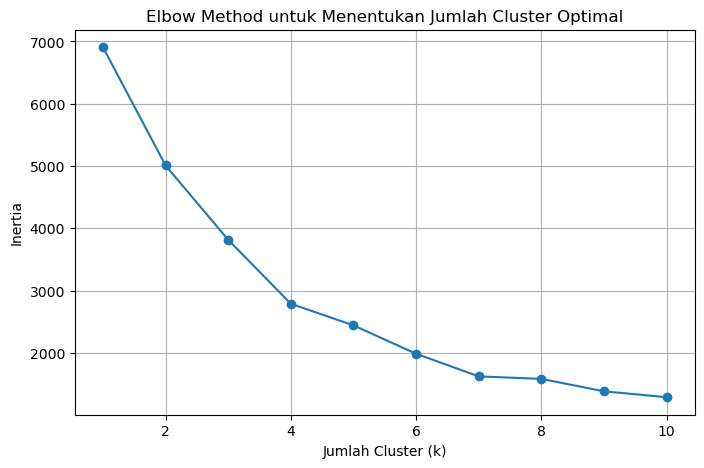

In [20]:
# Menentukan jumlah cluster optimal dengan metode Elbow
inertia = []
k_range = range(1, 11)  # Coba dari 1 hingga 10 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Plot Elbow

Dari plot Elbow diatas:

- Inertia turun drastis dari k=1 ke k=3.
- Setelah k=3, penurunan inertia mulai melambat, dengan "siku" yang cukup jelas di sekitar k=4.
- Setelah k=4, penurunan inertia semakin kecil dan cenderung stabil.

Kesimpulan: Jumlah cluster optimal sepertinya adalah **4**. Jadi, kita bisa lanjut dengan **4 cluster** ini.

In [21]:
# Terapkan K-Means dengan jumlah cluster yang dipilih (misalnya 4, sesuaikan setelah lihat Elbow)
n_clusters = 4  # Ganti sesuai hasil Elbow
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Tambahkan label cluster ke data asli
customer_data['Cluster'] = clusters

# Tampilkan 5 baris pertama dengan label cluster
print("5 Baris Pertama Data dengan Label Cluster:")
customer_data[['cstName', 'slsTotal_AM', 'slsTotal_SIKA', 'slsTotal_Mortar Indonesia', 'Cluster']].head()

5 Baris Pertama Data dengan Label Cluster:


c:\Users\Timothy Ciesha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,cstName,slsTotal_AM,slsTotal_SIKA,slsTotal_Mortar Indonesia,Cluster
1,33 BANGUNAN,0.0,1.918691e+07,0.0,0
2,ABADI JAYA,0.0,3.842355e+06,0.0,0
3,ABADI JAYA (CIPONDOH),4063170.0,2.858666e+06,0.0,0
4,ABADI JAYA (KARAWACI),7959825.0,1.470872e+08,0.0,3
5,ABADI MENCENG,341700.0,1.221266e+06,0.0,0


Data menunjukkan pelanggan sudah diberi label cluster (0 hingga 3)

In [22]:
# Hitung rata-rata fitur per cluster untuk analisis
cluster_summary = customer_data.groupby('Cluster').agg({
    'slsTotal_AM': 'mean',
    'slsTotal_SIKA': 'mean',
    'slsTotal_Mortar Indonesia': 'mean',
    'slsQty_AM': 'mean',
    'slsQty_SIKA': 'mean',
    'slsQty_Mortar Indonesia': 'mean',
    'slsNoSL_AM': 'mean',
    'slsNoSL_SIKA': 'mean',
    'slsNoSL_Mortar Indonesia': 'mean',
    'slsTotal': 'mean',
    'slsNoSL': 'mean'
}).reset_index()

print("\nRata-rata Fitur per Cluster:")
cluster_summary


Rata-rata Fitur per Cluster:


,Cluster,slsTotal_AM,slsTotal_SIKA,slsTotal_Mortar Indonesia,slsQty_AM,slsQty_SIKA,slsQty_Mortar Indonesia,slsNoSL_AM,slsNoSL_SIKA,slsNoSL_Mortar Indonesia,slsTotal,slsNoSL
0,0,2.041703e+06,2.658581e+07,3.937751e+04,11.783133,132.953815,0.602410,2.048193,8.827309,0.046185,3.042901e+07,10.518072
1,1,1.605659e+08,8.009408e+08,4.320000e+05,984.800000,4644.600000,8.000000,72.400000,152.400000,0.600000,9.797739e+08,216.200000
2,2,6.302820e+06,6.390068e+07,9.822800e+06,39.300000,320.500000,150.500000,7.800000,25.000000,4.800000,8.035388e+07,32.550000
3,3,1.485100e+07,2.158292e+08,1.238095e+05,85.552381,1156.733333,1.952381,15.123810,53.676190,0.152381,2.337902e+08,64.295238


- Cluster 0 (Pelanggan Kecil)
- Cluster 1 (Pelanggan Besar - Dominan AM dan SIKA)
- Cluster 2 (Pelanggan Menengah - Fokus Mortar Indonesia)
- Cluster 3 (Pelanggan Menengah-Besar - Dominan SIKA)

#### Fokus pada Mortar Indonesia

Karena kita ingin mengembangkan merek Mortar Indonesia, mari kita lihat performanya:

- Cluster 2 adalah yang paling menjanjikan untuk Mortar Indonesia (9.82e+06, 150.50 unit, 4.80 transaksi). Pelanggan di cluster ini sudah menunjukkan minat, jadi strategi retensi (misalnya diskon loyalitas) bisa efektif.
- Cluster 1 dan Cluster 3 memiliki pembelian Mortar Indonesia yang sangat kecil meskipun mereka adalah pelanggan besar. Ini menunjukkan peluang besar untuk promosi atau bundling produk Mortar Indonesia dengan AM/SIKA.
- Cluster 0 (pelanggan kecil) juga memiliki pembelian Mortar Indonesia yang minim, tetapi karena skala mereka kecil, fokus pada cluster ini mungkin kurang prioritas dibandingkan Cluster 1 dan 3.

## Langkah 7: Rekomendasi dan Visualisasi

Untuk membantu memahami cluster lebih lanjut, kita bisa membuat visualisasi distribusi pembelian Mortar Indonesia per cluster.

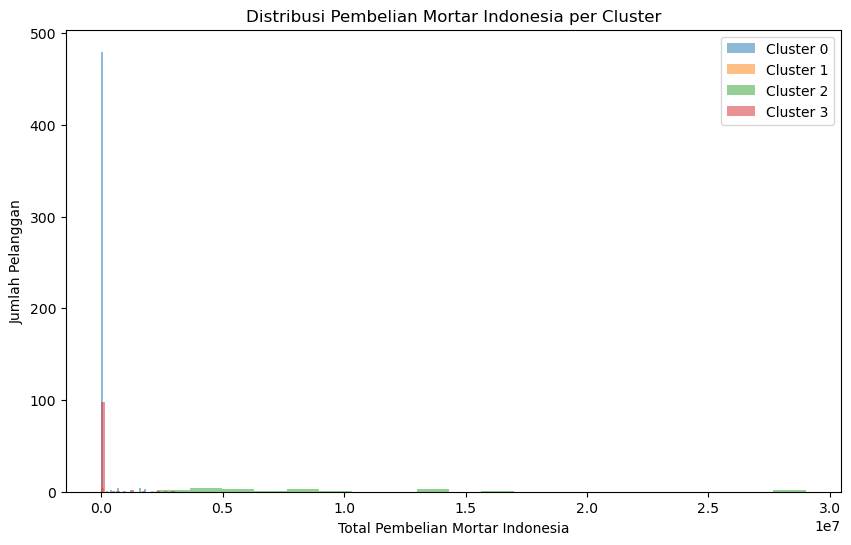


Jumlah Pelanggan per Cluster:
Cluster
0    498
3    105
2     20
1      5
Name: count, dtype: int64


In [23]:
# Visualisasi distribusi pembelian Mortar Indonesia per cluster
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.hist(customer_data[customer_data['Cluster'] == cluster]['slsTotal_Mortar Indonesia'], 
             bins=20, alpha=0.5, label=f'Cluster {cluster}')
plt.title('Distribusi Pembelian Mortar Indonesia per Cluster')
plt.xlabel('Total Pembelian Mortar Indonesia')
plt.ylabel('Jumlah Pelanggan')
plt.legend()
plt.show()

# Jumlah pelanggan per cluster
print("\nJumlah Pelanggan per Cluster:")
print(customer_data['Cluster'].value_counts())

### Rekomendasi:

- Cluster 2 (Pengguna Mortar Indonesia): Berikan insentif untuk meningkatkan pembelian (misalnya diskon volume atau program loyalitas).
- Cluster 1 dan 3 (Pelanggan Besar, Minim Mortar Indonesia): Lakukan kampanye promosi, seperti bundling Mortar Indonesia dengan AM/SIKA, atau tawarkan uji coba gratis untuk memperkenalkan produk.
- Cluster 0 (Pelanggan Kecil): Edukasi tentang manfaat Mortar Indonesia melalui promosi sederhana (misalnya brosur atau demo produk).

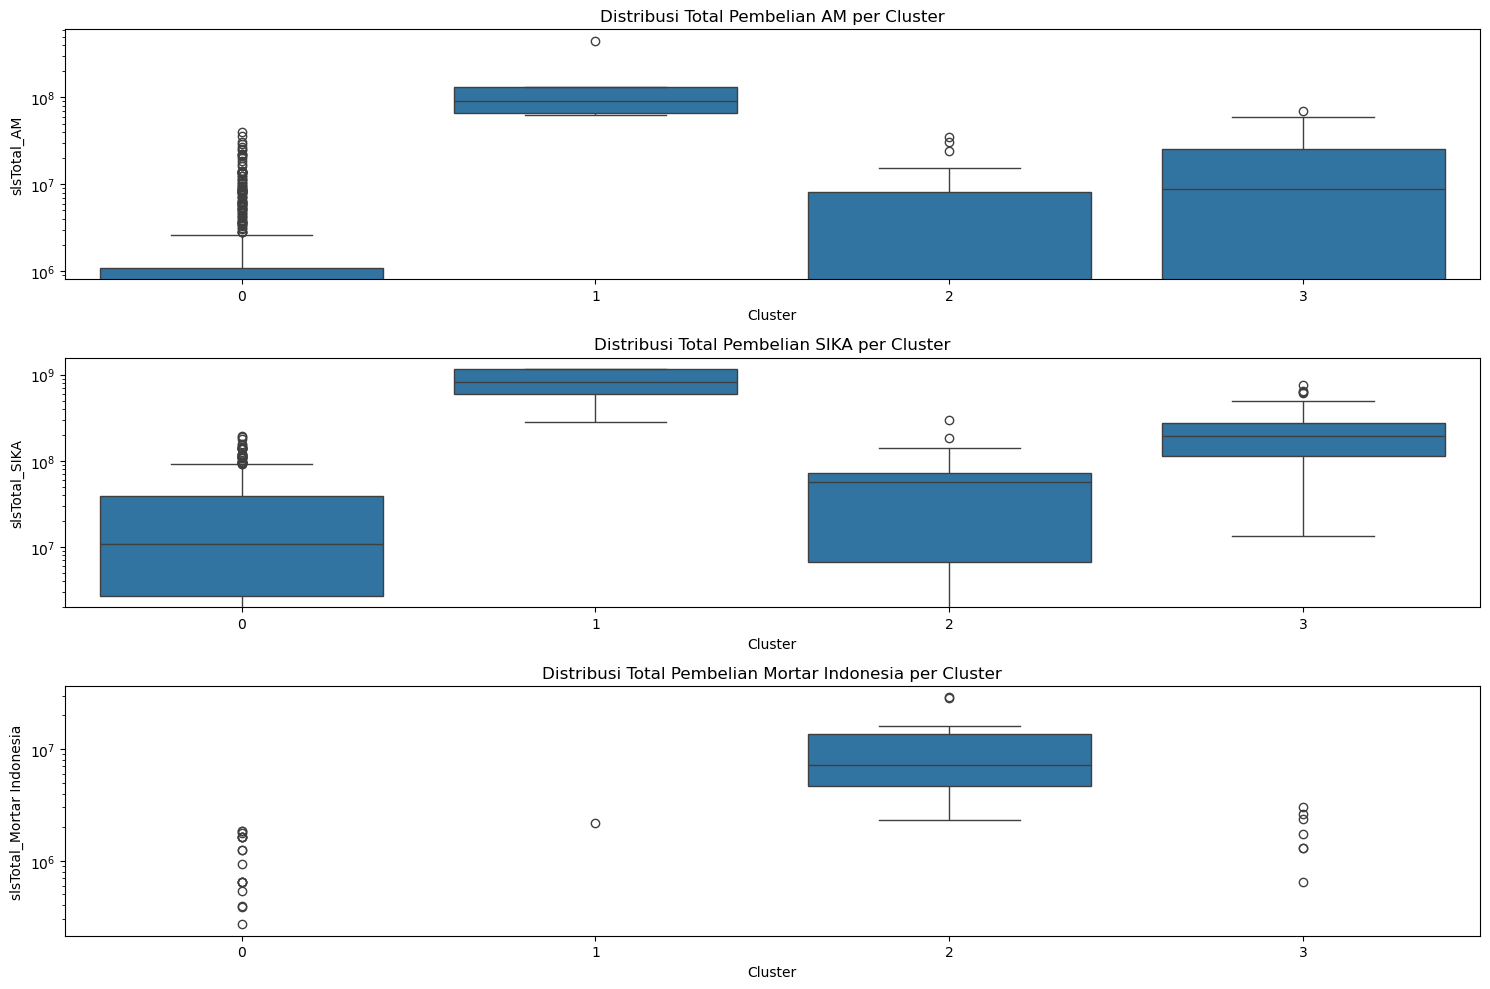

In [25]:
# Impor library tambahan untuk visualisasi
import seaborn as sns

# Pastikan cluster sudah ada di customer_data
if 'Cluster' not in customer_data.columns:
    customer_data['Cluster'] = clusters

# 1. Boxplot untuk distribusi total pembelian per merek di setiap cluster
plt.figure(figsize=(15, 10))

# Boxplot untuk slsTotal_AM
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='slsTotal_AM', data=customer_data)
plt.title('Distribusi Total Pembelian AM per Cluster')
plt.yscale('log')  # Skala logaritmik karena distribusi mungkin skewed

# Boxplot untuk slsTotal_SIKA
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='slsTotal_SIKA', data=customer_data)
plt.title('Distribusi Total Pembelian SIKA per Cluster')
plt.yscale('log')

# Boxplot untuk slsTotal_Mortar Indonesia
plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='slsTotal_Mortar Indonesia', data=customer_data)
plt.title('Distribusi Total Pembelian Mortar Indonesia per Cluster')
plt.yscale('log')

plt.tight_layout()
plt.show()

### Insights

1. Distribusi Total Pembelian AM per Cluster: 
    - Cluster 1 adalah kelompok dengan pembelian AM terbesar, diikuti oleh Cluster 3. Cluster 0 memiliki pembelian AM yang sangat kecil, dan Cluster 2 berada di tengah.

2. Distribusi Total Pembelian SIKA per Cluster:
    - Cluster 1 lagi-lagi menonjol dengan pembelian SIKA terbesar, diikuti oleh Cluster 3. Cluster 0 adalah yang terkecil, dan Cluster 2 berada di tengah.

3. Distribusi Total Pembelian Mortar Indonesia per Cluster:
    - Cluster 2 adalah yang paling aktif membeli Mortar Indonesia, sedangkan Cluster 0 dan 3 hampir tidak membeli. Cluster 1, meskipun pelanggan besar, masih minim pembelian Mortar Indonesia.

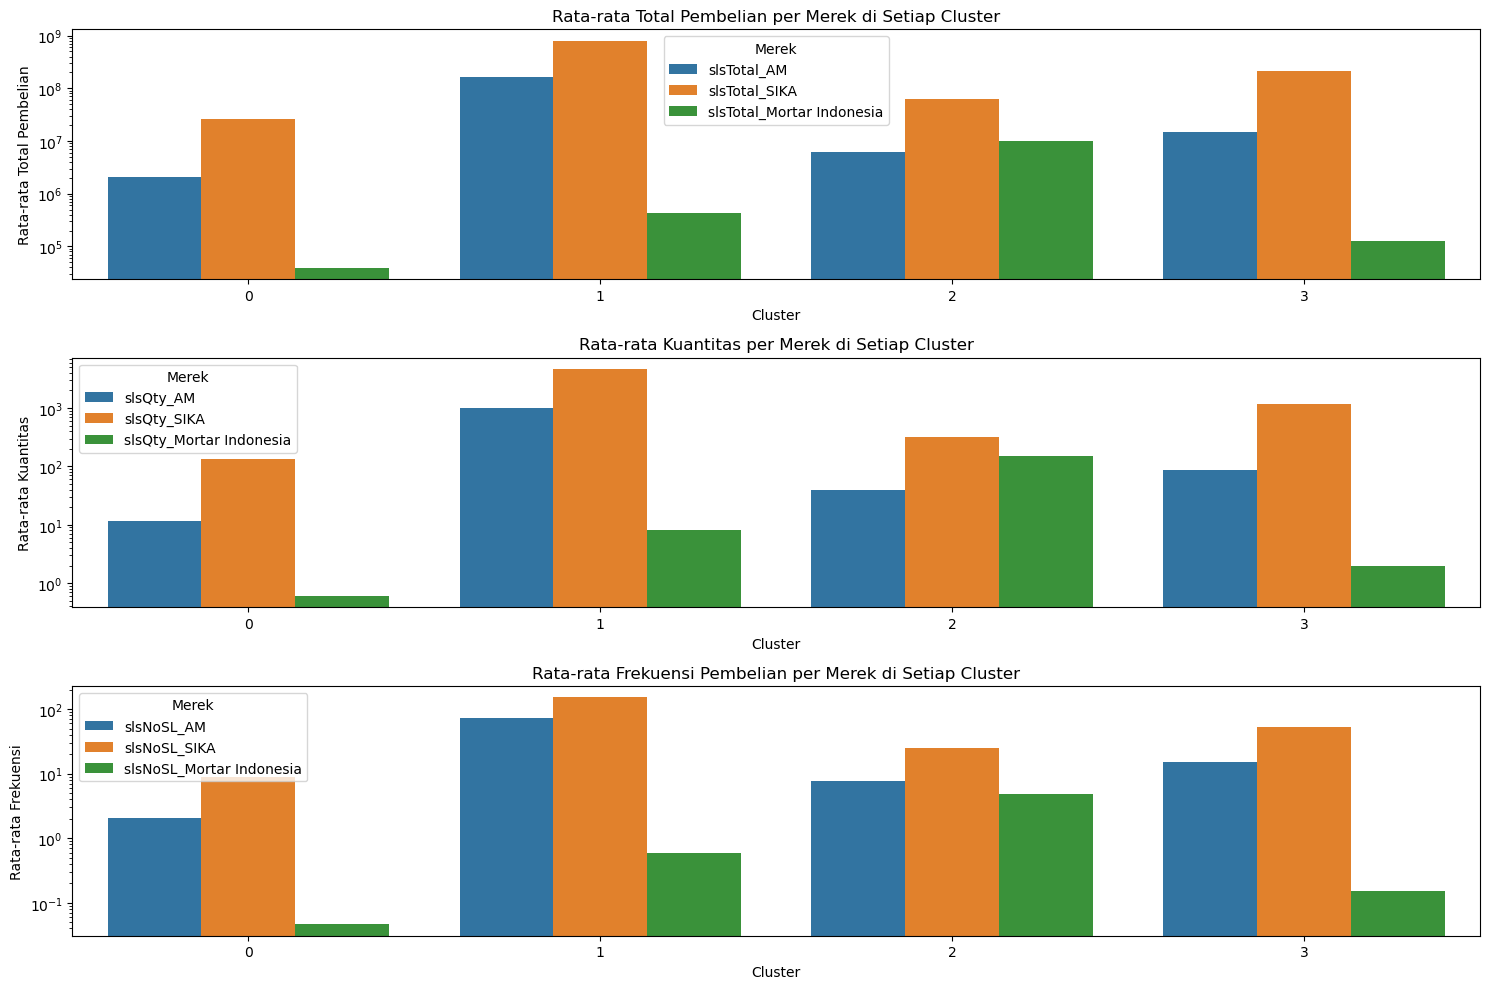

In [26]:
# 2. Bar Plot untuk rata-rata fitur per cluster
plt.figure(figsize=(15, 10))

# Bar plot untuk rata-rata total pembelian per merek
plt.subplot(3, 1, 1)
cluster_summary_melted = cluster_summary.melt(id_vars='Cluster', 
                                             value_vars=['slsTotal_AM', 'slsTotal_SIKA', 'slsTotal_Mortar Indonesia'],
                                             var_name='Merek', value_name='Rata-rata Total Pembelian')
sns.barplot(x='Cluster', y='Rata-rata Total Pembelian', hue='Merek', data=cluster_summary_melted)
plt.title('Rata-rata Total Pembelian per Merek di Setiap Cluster')
plt.yscale('log')

# Bar plot untuk rata-rata kuantitas per merek
plt.subplot(3, 1, 2)
cluster_summary_melted_qty = cluster_summary.melt(id_vars='Cluster', 
                                                 value_vars=['slsQty_AM', 'slsQty_SIKA', 'slsQty_Mortar Indonesia'],
                                                 var_name='Merek', value_name='Rata-rata Kuantitas')
sns.barplot(x='Cluster', y='Rata-rata Kuantitas', hue='Merek', data=cluster_summary_melted_qty)
plt.title('Rata-rata Kuantitas per Merek di Setiap Cluster')
plt.yscale('log')

# Bar plot untuk rata-rata frekuensi per merek
plt.subplot(3, 1, 3)
cluster_summary_melted_freq = cluster_summary.melt(id_vars='Cluster', 
                                                  value_vars=['slsNoSL_AM', 'slsNoSL_SIKA', 'slsNoSL_Mortar Indonesia'],
                                                  var_name='Merek', value_name='Rata-rata Frekuensi')
sns.barplot(x='Cluster', y='Rata-rata Frekuensi', hue='Merek', data=cluster_summary_melted_freq)
plt.title('Rata-rata Frekuensi Pembelian per Merek di Setiap Cluster')
plt.yscale('log')

plt.tight_layout()
plt.show()

## Insights

1. Rata-rata Total Pembelian per Merek:
    - Cluster 1 adalah pembeli terbesar untuk AM dan SIKA, tetapi minim Mortar Indonesia. Cluster 2 menonjol untuk Mortar Indonesia. Cluster 0 dan 3 memiliki pembelian Mortar Indonesia yang sangat kecil.

2. Rata-rata Kuantitas per Merek:
    - Pola serupa dengan total pembelian: Cluster 1 membeli dalam kuantitas besar untuk AM dan SIKA, Cluster 2 aktif untuk Mortar Indonesia, dan Cluster 0 serta 3 minim untuk Mortar Indonesia.

3. Rata-rata Frekuensi Pembelian per Merek:
    - Frekuensi pembelian mengikuti pola yang sama: Cluster 1 paling aktif, Cluster 2 cukup aktif untuk Mortar Indonesia, dan Cluster 0 serta 3 jarang membeli Mortar Indonesia.

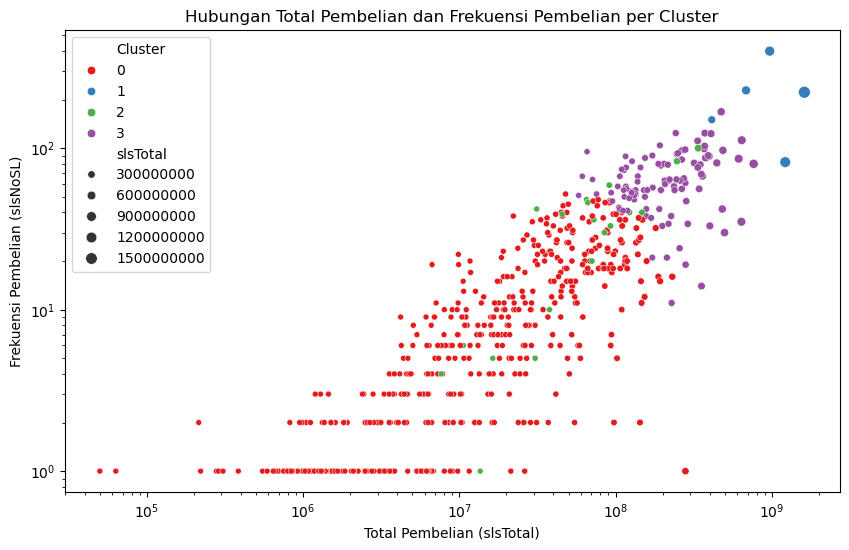


Jumlah Pelanggan per Cluster:
Cluster
0    498
3    105
2     20
1      5
Name: count, dtype: int64


In [27]:
# 3. Scatter Plot untuk hubungan total pembelian dan frekuensi, dengan warna berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='slsTotal', y='slsNoSL', hue='Cluster', size='slsTotal', data=customer_data, palette='Set1')
plt.title('Hubungan Total Pembelian dan Frekuensi Pembelian per Cluster')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Pembelian (slsTotal)')
plt.ylabel('Frekuensi Pembelian (slsNoSL)')
plt.show()

# Jumlah pelanggan per cluster (seperti sebelumnya)
print("\nJumlah Pelanggan per Cluster:")
print(customer_data['Cluster'].value_counts())

## Insights

Cluster 1 menonjol sebagai kelompok dengan pembelian dan frekuensi tertinggi. Cluster 0 adalah kelompok terkecil. Cluster 2 dan 3 berada di tengah, dengan Cluster 3 cenderung lebih besar dalam hal total pembelian.

- Cluster 0 adalah kelompok terbesar (498 pelanggan), tetapi mereka adalah pelanggan kecil.
- Cluster 1 sangat kecil (hanya 5 pelanggan), tetapi mereka adalah pembeli terbesar.
- Cluster 2 (20 pelanggan) dan Cluster 3 (105 pelanggan) adalah kelompok menengah, dengan Cluster 2 lebih kecil tetapi lebih aktif untuk Mortar Indonesia.

In [30]:
# Buat daftar pelanggan per cluster dengan informasi penting
customer_list = customer_data[[
    'cstName', 'Cluster', 
    'slsTotal_AM', 'slsTotal_SIKA', 'slsTotal_Mortar Indonesia',
    'slsQty_AM', 'slsQty_SIKA', 'slsQty_Mortar Indonesia',
    'slsNoSL_AM', 'slsNoSL_SIKA', 'slsNoSL_Mortar Indonesia',
    'slsTotal', 'slsNoSL'
]]

# Urutkan berdasarkan Cluster dan slsTotal (total pembelian keseluruhan) secara menurun
customer_list = customer_list.sort_values(by=['Cluster', 'slsTotal'], ascending=[True, False])

# Tampilkan 5 baris pertama untuk memastikan
print("5 Baris Pertama Daftar Pelanggan per Cluster:")
customer_list.head()

5 Baris Pertama Daftar Pelanggan per Cluster:


,cstName,Cluster,slsTotal_AM,slsTotal_SIKA,slsTotal_Mortar Indonesia,slsQty_AM,slsQty_SIKA,slsQty_Mortar Indonesia,slsNoSL_AM,slsNoSL_SIKA,slsNoSL_Mortar Indonesia,slsTotal,slsNoSL
196,GRIYA INDAH PERSADA,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.800000e+08,1
457,SELAMAT JAYA,0,0.0,2.249998e+06,0.0,0.0,21.0,0.0,0.0,3.0,0.0,2.306581e+08,16
538,SUMBER AGUNG,0,0.0,1.927080e+08,0.0,0.0,623.0,0.0,0.0,15.0,0.0,1.927080e+08,15
90,BINA KARYA,0,0.0,1.878820e+08,0.0,0.0,613.0,0.0,0.0,16.0,0.0,1.878820e+08,16
436,SAM JAYA,0,268260.0,1.803465e+08,0.0,1.0,559.0,0.0,1.0,32.0,0.0,1.806148e+08,32


In [31]:
# Simpan ke file Excel
output_file = 'customer_list_per_cluster.xlsx'
customer_list.to_excel(output_file, index=False)
print(f"\nDaftar pelanggan per cluster telah disimpan ke: {output_file}")


Daftar pelanggan per cluster telah disimpan ke: customer_list_per_cluster.xlsx


---

# Kesimpulan dan Rekomendasi Segmentasi Pelanggan

## Kesimpulan
Berdasarkan analisis clustering menggunakan K-Means dengan 4 cluster, berikut adalah karakteristik masing-masing kelompok pelanggan berdasarkan pola pembelian untuk merek `AM`, `SIKA`, dan `Mortar Indonesia`:

### Cluster 0: Pelanggan Kecil (498 Pelanggan)
- **Karakteristik**:
  - Total pembelian rendah: AM (~10⁶), SIKA (~10⁷), Mortar Indonesia (~10⁴).
  - Kuantitas dan frekuensi pembelian rendah: AM (11.78 unit, 2.05 transaksi), SIKA (132.95 unit, 8.83 transaksi), Mortar Indonesia (0.60 unit, 0.05 transaksi).
  - Total pembelian keseluruhan: ~3.04e+07, dengan rata-rata 10.52 transaksi.
- **Insight**: Ini adalah pelanggan kecil (mungkin toko kecil atau proyek skala kecil) dengan pembelian sporadis. Mereka jarang membeli Mortar Indonesia.

### Cluster 1: Pelanggan Besar (5 Pelanggan)
- **Karakteristik**:
  - Total pembelian sangat besar: AM (~10⁸), SIKA (~10⁹), Mortar Indonesia (~10⁵).
  - Kuantitas dan frekuensi tinggi: AM (984.80 unit, 72.40 transaksi), SIKA (4644.60 unit, 152.40 transaksi), Mortar Indonesia (8 unit, 0.60 transaksi).
  - Total pembelian keseluruhan: ~9.80e+08, dengan 216.20 transaksi.
- **Insight**: Ini adalah pelanggan besar (mungkin distributor atau kontraktor besar) yang sangat aktif membeli AM dan SIKA, tetapi pembelian Mortar Indonesia masih sangat kecil.

### Cluster 2: Pelanggan Menengah, Fokus Mortar Indonesia (20 Pelanggan)
- **Karakteristik**:
  - Total pembelian menengah: AM (~10⁷), SIKA (~10⁸), Mortar Indonesia (~10⁷).
  - Kuantitas dan frekuensi menengah: AM (39.30 unit, 7.80 transaksi), SIKA (320.50 unit, 25 transaksi), Mortar Indonesia (150.50 unit, 4.80 transaksi).
  - Total pembelian keseluruhan: ~8.04e+07, dengan 32.55 transaksi.
- **Insight**: Cluster ini menonjol karena pembelian Mortar Indonesia cukup signifikan. Mereka adalah pelanggan menengah yang sudah mulai menggunakan Mortar Indonesia.

### Cluster 3: Pelanggan Menengah-Besar, Dominan SIKA (105 Pelanggan)
- **Karakteristik**:
  - Total pembelian besar untuk SIKA: AM (~10⁷), SIKA (~10⁸), Mortar Indonesia (~10⁵).
  - Kuantitas dan frekuensi tinggi untuk SIKA: AM (85.55 unit, 15.12 transaksi), SIKA (1156.73 unit, 53.68 transaksi), Mortar Indonesia (1.95 unit, 0.15 transaksi).
  - Total pembelian keseluruhan: ~2.34e+08, dengan 64.30 transaksi.
- **Insight**: Pelanggan ini aktif membeli SIKA dalam jumlah besar, tetapi pembelian Mortar Indonesia sangat kecil.

## Rekomendasi
Berikut adalah strategi pemasaran yang disesuaikan untuk setiap cluster, dengan fokus pada pengembangan merek `Mortar Indonesia`:

### Cluster 0: Pelanggan Kecil
- **Strategi**: Fokus pada edukasi produk untuk meningkatkan awareness tentang Mortar Indonesia.
- **Taktik**:
  - Adakan seminar atau demo produk untuk memperkenalkan manfaat Mortar Indonesia.
  - Tawarkan paket uji coba dengan harga terjangkau atau diskon kecil untuk mendorong pembelian awal.
- **Prioritas**: Rendah (karena skala pembelian kecil, tetapi jumlah pelanggan banyak).

### Cluster 1: Pelanggan Besar
- **Strategi**: Manfaatkan status mereka sebagai pelanggan besar untuk cross-selling Mortar Indonesia.
- **Taktik**:
  - Tawarkan bundling produk (misalnya, beli SIKA dapat diskon Mortar Indonesia).
  - Berikan uji coba gratis atau sampel Mortar Indonesia untuk memperkenalkan produk.
  - Berikan insentif khusus untuk pembelian pertama Mortar Indonesia.
- **Prioritas**: Tinggi (potensi besar karena mereka adalah pembeli besar).

### Cluster 2: Pelanggan Menengah, Fokus Mortar Indonesia
- **Strategi**: Pertahankan dan tingkatkan pembelian Mortar Indonesia.
- **Taktik**:
  - Berikan program loyalitas, seperti diskon volume untuk pembelian Mortar Indonesia.
  - Tawarkan varian produk Mortar Indonesia atau paket khusus untuk meningkatkan pembelian.
  - Adakan kunjungan rutin untuk menjaga hubungan dengan pelanggan ini.
- **Prioritas**: Tinggi (mereka sudah aktif membeli Mortar Indonesia).

### Cluster 3: Pelanggan Menengah-Besar, Dominan SIKA
- **Strategi**: Dorong pembelian Mortar Indonesia melalui cross-selling.
- **Taktik**:
  - Gunakan strategi bundling serupa dengan Cluster 1 (misalnya, beli SIKA dapat diskon Mortar Indonesia).
  - Berikan insentif untuk pembelian pertama Mortar Indonesia, seperti diskon atau bonus produk.
  - Edukasi tentang keunggulan Mortar Indonesia dibandingkan merek lain.
- **Prioritas**: Sedang-Tinggi (potensi besar karena mereka adalah pembeli aktif untuk SIKA).

## Fokus Pengembangan Mortar Indonesia
- **Prioritas Utama**: Cluster 2 (sudah aktif membeli Mortar Indonesia, fokus retensi).
- **Peluang Besar**: Cluster 1 dan Cluster 3 (pelanggan besar tetapi minim membeli Mortar Indonesia, fokus cross-selling).
- **Pendekatan Massal**: Cluster 0 (edukasi massal untuk meningkatkan awareness, meskipun prioritas lebih rendah).


---